In [ ]:
#Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å Ïó∞Îèô
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#ÌååÏù¥ÌÜ†Ïπò ÏÑ§Ïπò_ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò
!pip install -U segmentation-models-pytorch


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 154.8/154.8 kB 7.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 125.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 98.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 61.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [ ]:
#ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import os
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim

In [ ]:
#Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Ï†ïÏùò
class ClearGraspDataset(Dataset):
    def __init__(self, image_dir, edge_dir, transform=None):
        self.image_dir = image_dir
        self.edge_dir = edge_dir
        self.transform = transform

        image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]
        edge_files  = [f for f in os.listdir(edge_dir) if f.endswith('.jpg') or f.endswith('.png')]

        #Ïò§Î•ò Î∞©ÏßÄ ÏúÑÌï¥ Í≥µÎ∞± Ï†úÍ±∞Ìïú Ïù¥Î¶ÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Îß§Ïπ≠
        image_map = {f.replace(" ", "").rsplit(".", 1)[0]: f for f in image_files}
        edge_map  = {f.replace(" ", "").rsplit(".", 1)[0]: f for f in edge_files}

        common_keys = sorted(set(image_map.keys()) & set(edge_map.keys()))

        if not common_keys:
            raise ValueError("ÏùºÏπòÌïòÎäî Ïù¥ÎØ∏ÏßÄ-ÎßàÏä§ÌÅ¨ ÏåçÏù¥ ÏóÜÏäµÎãàÎã§.")

        self.image_files = [image_map[k] for k in common_keys]
        self.edge_files  = [edge_map[k] for k in common_keys]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        edge_path = os.path.join(self.edge_dir, self.edge_files[idx])

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        edge = cv2.imread(edge_path, cv2.IMREAD_GRAYSCALE)

        if self.transform:
            augmented = self.transform(image=image, edge=edge)
            image = augmented["image"]
            edge = augmented["edge"]  # Ïù¥ÎØ∏ Tensor

        return image, edge.long()

In [ ]:
#Îç∞Ïù¥ÌÑ∞ ÏÖã Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎçî Íµ¨ÏÑ±ÌïòÍ∏∞

#ÌïôÏäµÏÖã Í≤ΩÎ°ú
train_image_dir = "/content/drive/MyDrive/Cleargrasp_Dataset/train/images"
train_edge_dir  = "/content/drive/MyDrive/Cleargrasp_Dataset/train/outlines/outline"

#Í≤ÄÏ¶ùÏÖã Í≤ΩÎ°ú
val_image_dir = "/content/drive/MyDrive/Cleargrasp_Dataset/val/image/images"
val_edge_dir  = "/content/drive/MyDrive/Cleargrasp_Dataset/val/outlines/outline"

import albumentations as A
from albumentations.pytorch import ToTensorV2

#Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
transform = A.Compose([
    A.Resize(256, 256),
    A.Normalize(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225)),
    ToTensorV2()
], additional_targets={'edge': 'mask'})

#Dataset Ï†ïÏùò
train_dataset = ClearGraspDataset(train_image_dir, train_edge_dir, transform=transform)
val_dataset   = ClearGraspDataset(val_image_dir, val_edge_dir, transform=transform)

#DataLoader Ï†ïÏùò
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

'''
#Dataset Ï†ïÏùò
train_dataset = ClearGraspDataset(train_image_dir, train_edge_dir, transform=transform)
val_dataset   = ClearGraspDataset(val_image_dir, val_edge_dir, transform=transform)

#DataLoader Ï†ïÏùò
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
'''

'\n#Dataset Ï†ïÏùò\ntrain_dataset = ClearGraspDataset(train_image_dir, train_edge_dir, transform=transform)\nval_dataset   = ClearGraspDataset(val_image_dir, val_edge_dir, transform=transform)\n\n#DataLoader Ï†ïÏùò\ntrain_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)\nval_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)\n'

In [ ]:
#Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
print(f"TrainÏÖã ÌÅ¨Í∏∞: {len(train_dataset)}Í∞ú")
print(f"ValÏÖã ÌÅ¨Í∏∞  : {len(val_dataset)}Í∞ú")

sample_img, sample_edge = train_dataset[0]
print("Ïù¥ÎØ∏ÏßÄ shape:", sample_img.shape)
print("edge shape:", sample_edge.shape)

TrainÏÖã ÌÅ¨Í∏∞: 45454Í∞ú
ValÏÖã ÌÅ¨Í∏∞  : 532Í∞ú
Ïù¥ÎØ∏ÏßÄ shape: torch.Size([3, 256, 256])
edge shape: torch.Size([256, 256])


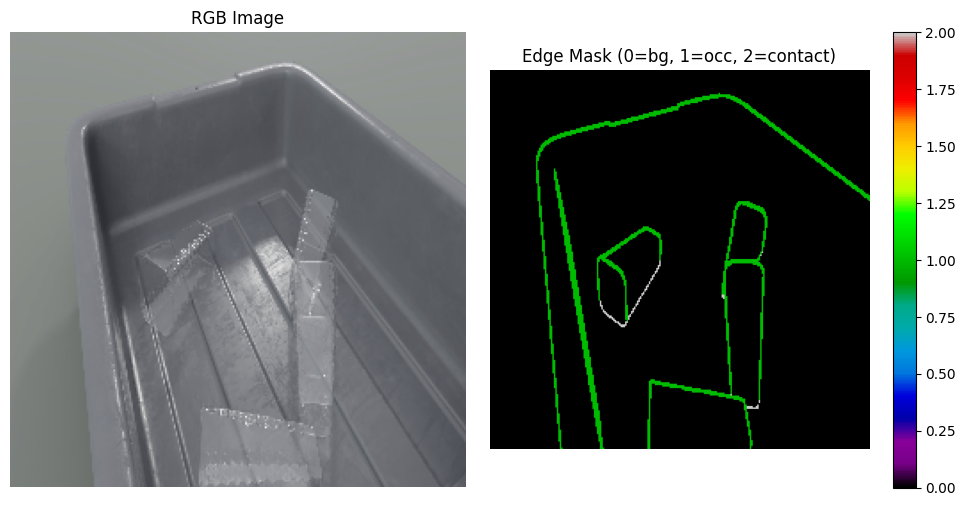

In [ ]:
#Ïù¥ÎØ∏ÏßÄÏôÄ Ïó£ÏßÄÍ∞Ä Ïûò Îß§ÌïëÎêêÎÇò ÌôïÏù∏
import matplotlib.pyplot as plt

#Ï†ïÍ∑úÌôî Ìï¥Ï†ú Ìï®Ïàò_ÏóÜÏúºÎ©¥ ÏÇ¨ÏßÑÏù¥ ÌååÎûóÍ≤å ÎÇòÏò¥
def denormalize(tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    mean = torch.tensor(mean).view(3, 1, 1).to(tensor.device)
    std = torch.tensor(std).view(3, 1, 1).to(tensor.device)
    return tensor * std + mean

#Ï≤´ ÏÉòÌîå Í∞ÄÏ†∏Ïò§Í∏∞
image_tensor, mask_tensor = train_dataset[0]

#Ï†ïÍ∑úÌôî Ìï¥Ï†ú
image_tensor = denormalize(image_tensor)

#Tensor ‚Üí NumPyÎ°ú Î≥ÄÌôò_Ïò§Î•ò ÏóÜÏï†Í∏∞ ÏúÑÌï®
image_np = image_tensor.permute(1, 2, 0).cpu().numpy()   # (C, H, W) ‚Üí (H, W, C)
image_np = np.clip(image_np, 0, 1).astype(np.float32)

mask_np = mask_tensor.cpu().numpy()

#ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("RGB Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask_np, cmap='nipy_spectral', vmin=0, vmax=2)
plt.title("Edge Mask (0=bg, 1=occ, 2=contact)")
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#ÏÇ¨Ï†ÑÌïôÏäµÎêú U-net Î™®Îç∏ Î°úÎî©
model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    in_channels=3,
    classes=3,
).cuda()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

In [ ]:
#ÏÜêÏã§Ìï®Ïàò Î∞è ÏµúÏ†ÅÌôîÌï®Ïàò
class_weights = torch.tensor([1.0, 4.0, 6.0]).cuda() #Í∞ÄÏ§ëÏπò Ï∂îÍ∞Ä
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
'''
Í∏∞Ï°¥ ÌïôÏäµÎ£®ÌîÑ
#ÌïôÏäµ Î£®ÌîÑ
def train_model(n_epochs=10):
    best_val_loss = float('inf')
    for epoch in range(n_epochs):
        model.train()
        train_loss = 0
        for imgs, edges in tqdm(train_loader, desc=f"Epoch {epoch+1}/{n_epochs}"):
            imgs, edges = imgs.cuda(), edges.cuda()
            outputs = model(imgs)
            loss = criterion(outputs, edges)
            train_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        val_loss = 0
        model.eval()
        with torch.no_grad():
            for imgs, edges in val_loader:
                imgs, edges = imgs.cuda(), edges.cuda()
                outputs = model(imgs)
                loss = criterion(outputs, edges)
                val_loss += loss.item()

        print(f"Epoch {epoch+1} | Train Loss: {train_loss/len(train_loader):.4f} | Val Loss: {val_loss/len(val_loader):.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_cleargrasp_unet.pth")
            print("Best model saved")
            '''

In [ ]:
#earlystopping Ï∂îÍ∞ÄÌïú ÌïôÏäµÎ£®ÌîÑ
def train_model(n_epochs=10, patience=3):
    best_val_loss = float('inf')
    epochs_no_improve = 0  # Í∞úÏÑ†ÎêòÏßÄ ÏïäÏùÄ epoch Ïàò
    for epoch in range(n_epochs):
        model.train()
        train_loss = 0
        for imgs, edges in tqdm(train_loader, desc=f"Epoch {epoch+1}/{n_epochs}"):
            imgs, edges = imgs.cuda(), edges.cuda()
            outputs = model(imgs)
            loss = criterion(outputs, edges)
            train_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        val_loss = 0
        model.eval()
        with torch.no_grad():
            for imgs, edges in val_loader:
                imgs, edges = imgs.cuda(), edges.cuda()
                outputs = model(imgs)
                loss = criterion(outputs, edges)
                val_loss += loss.item()

        train_loss_avg = train_loss / len(train_loader)
        val_loss_avg = val_loss / len(val_loader)

        print(f"Epoch {epoch+1} | Train Loss: {train_loss_avg:.4f} | Val Loss: {val_loss_avg:.4f}")

        # Í∞úÏÑ† Ïó¨Î∂Ä ÌôïÏù∏
        if val_loss_avg < best_val_loss:
            best_val_loss = val_loss_avg
            torch.save(model.state_dict(), "best_cleargrasp_unet.pth")
            print("‚úÖ Best model saved.")
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            print(f"‚ö†Ô∏è No improvement for {epochs_no_improve} epoch(s).")

        # patience Ï¥àÍ≥º Ïãú ÌïôÏäµ Ï¢ÖÎ£å
        if epochs_no_improve >= patience:
            print(f"‚õî Early stopping triggered after {patience} epochs without improvement.")
            break

In [ ]:
#Ï†ïÍ∑úÌôî Ìï¥Ï†ú Ìï®Ïàò Ï†ïÏùò
def visualize_predictions():
    model.eval()
    imgs, edges = next(iter(val_loader))
    imgs, edges = imgs.cuda(), edges.cuda()

    with torch.no_grad():
        preds = model(imgs)
        preds = torch.argmax(preds, dim=1)

    #Ï†ïÍ∑úÌôî Ìï¥Ï†ú + torchÏóêÏÑú clamp + numpyÎ°ú Î≥ÄÌôò
    imgs = denormalize(imgs)
    imgs = imgs.clamp(0, 1).cpu()
    imgs = imgs.permute(0, 2, 3, 1).numpy()
    imgs = np.clip(imgs, 0, 1).astype(np.float32)  # float32Î°ú Í≥†Ï†ï

    edges = edges.cpu().numpy()
    preds = preds.cpu().numpy()

    for i in range(min(3, len(imgs))):
        fig, axs = plt.subplots(1, 3, figsize=(12, 4))

        axs[0].imshow(imgs[i])
        axs[0].set_title("RGB Image")

        axs[1].imshow(edges[i], cmap='nipy_spectral', vmin=0, vmax=2)
        axs[1].set_title("Ground Truth")

        axs[2].imshow(preds[i], cmap='nipy_spectral', vmin=0, vmax=2)
        axs[2].set_title("Prediction")

        for ax in axs:
            ax.axis('off')

        plt.tight_layout()
        plt.show()

Epoch 1/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1421/1421 [6:50:23<00:00, 17.33s/it]


Epoch 1 | Train Loss: 0.1900 | Val Loss: 0.1288
‚úÖ Best model saved.


Epoch 2/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1421/1421 [12:42<00:00,  1.86it/s]


Epoch 2 | Train Loss: 0.1025 | Val Loss: 0.1107
‚úÖ Best model saved.


Epoch 3/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1421/1421 [12:31<00:00,  1.89it/s]


Epoch 3 | Train Loss: 0.0884 | Val Loss: 0.1099
‚úÖ Best model saved.


Epoch 4/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1421/1421 [12:25<00:00,  1.91it/s]


Epoch 4 | Train Loss: 0.0805 | Val Loss: 0.0854
‚úÖ Best model saved.


Epoch 5/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1421/1421 [12:17<00:00,  1.93it/s]


Epoch 5 | Train Loss: 0.0723 | Val Loss: 0.0899
‚ö†Ô∏è No improvement for 1 epoch(s).


Epoch 6/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1421/1421 [12:16<00:00,  1.93it/s]


Epoch 6 | Train Loss: 0.0687 | Val Loss: 0.0797
‚úÖ Best model saved.


Epoch 7/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1421/1421 [12:08<00:00,  1.95it/s]


Epoch 7 | Train Loss: 0.0663 | Val Loss: 0.0748
‚úÖ Best model saved.


Epoch 8/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1421/1421 [12:11<00:00,  1.94it/s]


Epoch 8 | Train Loss: 0.0609 | Val Loss: 0.0957
‚ö†Ô∏è No improvement for 1 epoch(s).


Epoch 9/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1421/1421 [12:07<00:00,  1.95it/s]


Epoch 9 | Train Loss: 0.0601 | Val Loss: 0.0880
‚ö†Ô∏è No improvement for 2 epoch(s).


Epoch 10/50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1421/1421 [12:12<00:00,  1.94it/s]


Epoch 10 | Train Loss: 0.0576 | Val Loss: 0.1808
‚ö†Ô∏è No improvement for 3 epoch(s).
‚õî Early stopping triggered after 3 epochs without improvement.


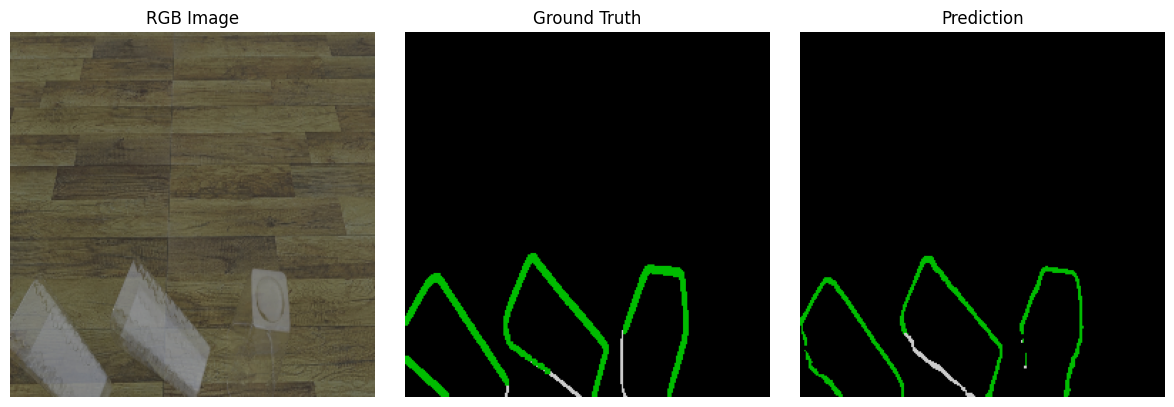

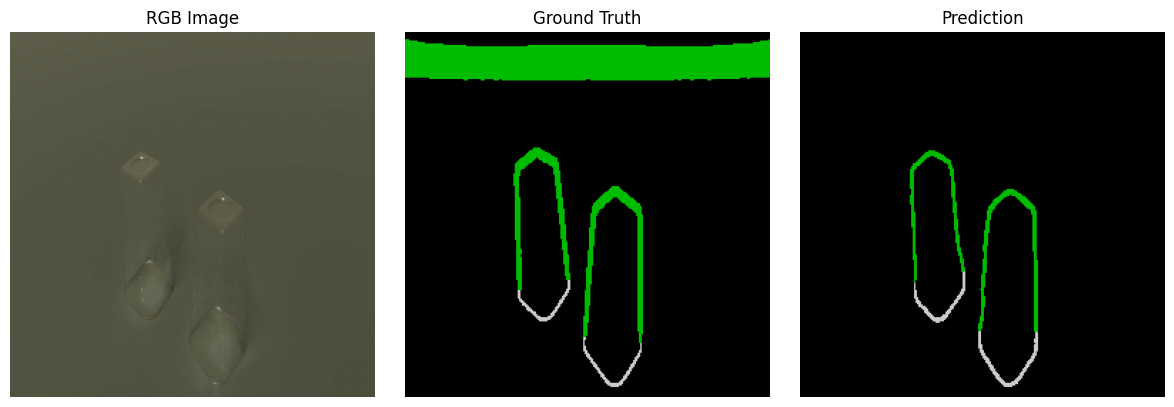

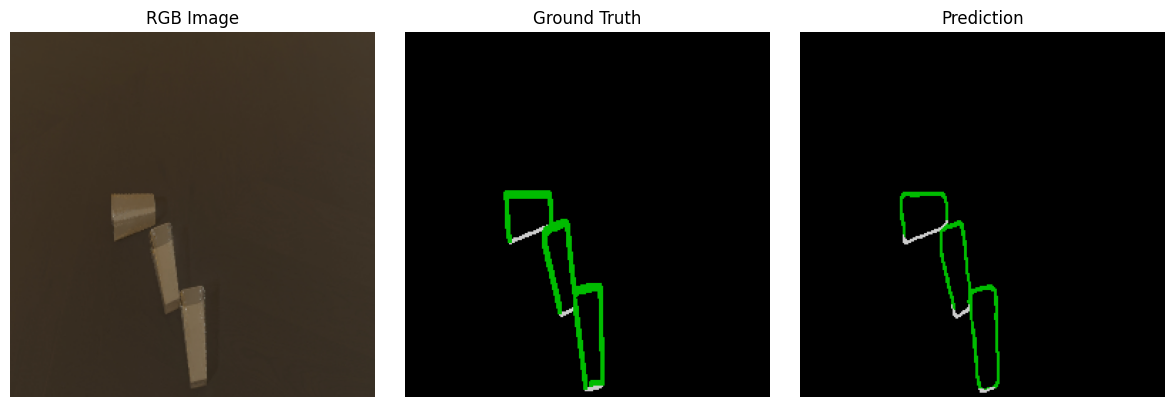

In [ ]:
#Ïã§Ìñâ
if __name__ == '__main__':
    train_model(n_epochs=50)
    visualize_predictions()

In [ ]:
'''
#ÏµúÏ¥à 1ÌöåÎßå Ïã§Ìñâ - Ïù¥ÎØ∏ ÎìúÎùºÏù¥Î∏åÏóê ÌååÏùº ÎßåÎì§Ïñ¥Ï†∏ ÏûàÏùå!
#Ïô∏Í≥ΩÏÑ† Ïù¥ÎØ∏ÏßÄÏôÄ RGB Ïù¥ÎØ∏ÏßÄ Îß§Ïπ≠ÏãúÌÇ§Í∏∞
import os
import shutil

# ÏõêÎ≥∏ Ìè¥Îçî
test_img_dir = "/content/drive/MyDrive/Cleargrasp_Dataset/test/images"
test_edge_dir = "/content/drive/MyDrive/Cleargrasp_Dataset/test/outlines/outline"

# Ï†ÄÏû•Ìï† Ìè¥Îçî
matched_img_dir = "/content/drive/MyDrive/Cleargrasp_Dataset/test/image"
matched_edge_dir = "/content/drive/MyDrive/Cleargrasp_Dataset/test/outline"
os.makedirs(matched_img_dir, exist_ok=True)
os.makedirs(matched_edge_dir, exist_ok=True)

# ÌååÏùºÎ™ÖÏóêÏÑú Î≤àÌò∏Îßå Ï∂îÏ∂úÌïòÎäî Ìï®Ïàò
import re
def extract_id(filename):
    match = re.search(r'\((\d+)\)', filename)
    return match.group(1) if match else None

# RGB Ïù¥ÎØ∏ÏßÄÏôÄ Ïó£ÏßÄ Ïù¥Î¶Ñ Î™©Î°ù Î∂àÎü¨Ïò§Í∏∞
img_files = [f for f in os.listdir(test_img_dir) if f.endswith(('.jpg', '.png'))]
edge_files = [f for f in os.listdir(test_edge_dir) if f.endswith(('.jpg', '.png'))]

# ID Îß§Ìïë
img_dict = {extract_id(f): f for f in img_files}
edge_dict = {extract_id(f): f for f in edge_files}

# Í≥µÌÜµ ID Ï∂îÏ∂ú
common_ids = set(img_dict.keys()).intersection(set(edge_dict.keys()))

print(f"Îß§Ïπ≠Îêú ÏÉòÌîå Ïàò: {len(common_ids)}")

# Îß§Ïπ≠Îêú ÌååÏùº Î≥µÏÇ¨
for id_ in common_ids:
    src_img = os.path.join(test_img_dir, img_dict[id_])
    src_edge = os.path.join(test_edge_dir, edge_dict[id_])

    dst_img = os.path.join(matched_img_dir, img_dict[id_])
    dst_edge = os.path.join(matched_edge_dir, edge_dict[id_])

    shutil.copy(src_img, dst_img)
    shutil.copy(src_edge, dst_edge)
    '''

‚úÖ Îß§Ïπ≠Îêú ÏÉòÌîå Ïàò: 109


In [ ]:
#ÌÖåÏä§Ìä∏ÏÖã Ï†ïÏùò
test_dataset = ClearGraspDataset(
    image_dir="/content/drive/MyDrive/Cleargrasp_Dataset/test/image",
    edge_dir="/content/drive/MyDrive/Cleargrasp_Dataset/test/outline",
    transform=transform
)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [ ]:
#ÌïôÏäµÎêú best Î™®Îç∏ Î°úÎìú
model.load_state_dict(torch.load("best_cleargrasp_unet.pth"))
model.eval()

#ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ Ï∂úÎ†•
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#ÌòºÎèôÌñâÎ†¨ Ìï®Ïàò ÏßÄÏ†ï
def plot_confusion_matrix(cm, class_names=None, normalize=False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd',
                cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix' + (' (Normalized)' if normalize else ''))
    plt.tight_layout()
    plt.show()

#Ï†ïÌôïÎèÑ Ìï®Ïàò ÏßÄÏ†ï
def calculate_classwise_accuracy(loader, num_classes=3, class_names=["BG", "Occlusion", "Contact"]):
    y_true_all, y_pred_all = [], []

    with torch.no_grad():
        for imgs, edges in tqdm(loader, desc="Testing"):
            imgs, edges = imgs.cuda(), edges.cuda()
            outputs = model(imgs)
            preds = torch.argmax(outputs, dim=1)

            y_true_all.extend(edges.view(-1).cpu().numpy())
            y_pred_all.extend(preds.view(-1).cpu().numpy())

    cm = confusion_matrix(y_true_all, y_pred_all, labels=list(range(num_classes)))

    #Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ Ï†ïÌôïÎèÑ
    acc_per_class = cm.diagonal() / cm.sum(axis=1)
    for i, acc in enumerate(acc_per_class):
        print(f"Class {i} ({class_names[i]}) Accuracy: {acc:.4f}")

    #Ï†ÑÏ≤¥ ÌîΩÏÖÄ Ï†ïÌôïÎèÑ
    pixel_acc = np.mean(np.array(y_true_all) == np.array(y_pred_all))
    print(f"\nüéØ Total Pixel Accuracy: {pixel_acc * 100:.2f}%")

    #ÌòºÎèôÌñâÎ†¨ ÏãúÍ∞ÅÌôî
    plot_confusion_matrix(cm, class_names=class_names, normalize=True)

In [ ]:
#f1Ïä§ÏΩîÏñ¥ Í∞ôÏùÄ ÏßÄÌëú ÌëúÌòÑ
from sklearn.metrics import classification_report

def calculate_metrics(loader, num_classes=3, class_names=["BG", "Occlusion", "Contact"]):
    y_true_all, y_pred_all = [], []

    with torch.no_grad():
        for imgs, edges in tqdm(loader, desc="Testing"):
            imgs, edges = imgs.cuda(), edges.cuda()
            outputs = model(imgs)
            preds = torch.argmax(outputs, dim=1)

            y_true_all.extend(edges.view(-1).cpu().numpy())
            y_pred_all.extend(preds.view(-1).cpu().numpy())

    # ÌòºÎèôÌñâÎ†¨
    cm = confusion_matrix(y_true_all, y_pred_all, labels=list(range(num_classes)))
    plot_confusion_matrix(cm, class_names=class_names, normalize=True)

    # Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®, F1 Ï∂úÎ†•
    print("\nClassification Report:")
    print(classification_report(y_true_all, y_pred_all, target_names=class_names, digits=4))

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import torch
from tqdm import tqdm

#IoU, Dice score Ï∂úÎ†•
def calculate_iou_and_dice(loader, num_classes=3, class_names=["BG", "Occlusion", "Contact"]):
    y_true_all, y_pred_all = [], []

    model.eval()
    with torch.no_grad():
        for imgs, edges in tqdm(loader, desc="Evaluating"):
            imgs, edges = imgs.cuda(), edges.cuda()
            outputs = model(imgs)
            preds = torch.argmax(outputs, dim=1)

            y_true_all.append(edges.view(-1).cpu().numpy())
            y_pred_all.append(preds.view(-1).cpu().numpy())

    y_true_all = np.concatenate(y_true_all)
    y_pred_all = np.concatenate(y_pred_all)

    ious = []
    dices = []

    print("\nPer-class Evaluation:\n")
    for cls in range(num_classes):
        tp = np.logical_and(y_pred_all == cls, y_true_all == cls).sum()
        fp = np.logical_and(y_pred_all == cls, y_true_all != cls).sum()
        fn = np.logical_and(y_pred_all != cls, y_true_all == cls).sum()

        denom_iou = tp + fp + fn
        denom_dice = 2 * tp + fp + fn

        iou = tp / denom_iou if denom_iou != 0 else float('nan')
        dice = (2 * tp) / denom_dice if denom_dice != 0 else float('nan')

        ious.append(iou)
        dices.append(dice)

        print(f"[Class {cls} - {class_names[cls]}]")
        print(f"   IoU   : {iou:.4f}")
        print(f"   Dice  : {dice:.4f}\n")

    # ÌèâÍ∑† Í≥ÑÏÇ∞ (NaN Ï†úÏô∏)
    mean_iou = np.nanmean(ious)
    mean_dice = np.nanmean(dices)

    print(f"Mean IoU (mIoU)      : {mean_iou:.4f}")
    print(f"Mean Dice Score (mDice) : {mean_dice:.4f}")

**ÏòàÏ∏°Í∞íÍ≥º Ï†ïÎãµÏù¥ ÏñºÎßàÎÇò Ïûò Í≤πÏ≥§ÎäîÏßÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÏàòÏπò**

IoU :  ÏòàÏ∏°Í≤∞Í≥ºÏôÄ Ï†ïÎãµÏùò ÍµêÏßëÌï©ÏùÑ Ìï©ÏßëÌï©ÏúºÎ°ú ÎÇòÎàà Í∞í

Dice score : ÏòàÏ∏°Í≤∞Í≥ºÏôÄ Ï†ïÎãµÏùò 2Î∞∞ ÍµêÏßëÌï©ÏùÑ Ìï©ÏúºÎ°ú ÎÇòÎàà Í∞í

In [ ]:
calculate_iou_and_dice(test_loader) #ÌèâÍ∞ÄÏßÄÌëú Ï§ë Iou, Dice score Ï∂úÎ†•

Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  7.10it/s]


Per-class Evaluation:

[Class 0 - BG]
   IoU   : 0.9674
   Dice  : 0.9834

[Class 1 - Occlusion]
   IoU   : 0.5305
   Dice  : 0.6933

[Class 2 - Contact]
   IoU   : 0.2358
   Dice  : 0.3816

Mean IoU (mIoU)      : 0.5779
Mean Dice Score (mDice) : 0.6861


Ï†ïÎ∞ÄÎèÑ(precision) : ÏñëÏÑ±Ïù¥ÎùºÍ≥† ÏòàÏ∏°Ìïú Í∞í Ï§ë Ïã§Ï†úÎ°ú ÏñëÏÑ±Ïù∏ Í≤ÉÏùò ÎπÑÏú®

ÎØºÍ∞êÎèÑ(recall) : Ïã§Ï†ú ÏñëÏÑ± Ï§ë Ï†ïÎãµ ÎπÑÏú®(Ï†ïÌôïÎèÑÏôÄ Í∞ôÏùÄ Ïó≠Ìï†)

F1Ïä§ÏΩîÏñ¥ : 2xÏ†ïÎ∞ÄÎèÑxÎØºÍ∞êÎèÑ / Ï†ïÎ∞ÄÎèÑ+ÎØºÍ∞êÎèÑ

Macro avg. : Î™®Îì† ÌÅ¥ÎûòÏä§Ïùò ÌèâÍ∑†

Weighted avg. : Í∞Å ÌÅ¥ÎûòÏä§Ïùò ÏÉòÌîåÏàòÎ•º Î∞òÏòÅÌïú ÌèâÍ∑†(=ÎπÑÏú® Î∂àÍ∑†Ìòï Í≥†Î†§Ìïú Í∞í)

Testing: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  6.25it/s]


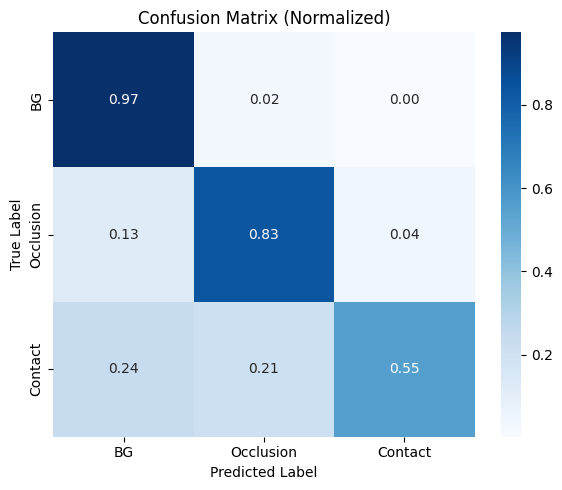


Classification Report:
              precision    recall  f1-score   support

          BG     0.9936    0.9734    0.9834    125363
   Occlusion     0.5939    0.8326    0.6933      5215
     Contact     0.2909    0.5547    0.3816       494

    accuracy                         0.9663    131072
   macro avg     0.6261    0.7869    0.6861    131072
weighted avg     0.9751    0.9663    0.9696    131072



In [ ]:
calculate_metrics(test_loader) #ÌèâÍ∞ÄÏßÄÌëú Ï∂úÎ†•